WS 25/26
# WP5: Neural Computation

Thomas Wachtler  
*CNS, Faculty of Biology, LMU Munich*

## Exercise 2

---

---
## I. Convolution ##
The input-output relation of a linear shift-invariant system is described by a convolution.
Convolution is a mathematical operation on two functions f and g that produces a third function that is typically viewed as a modified version of one of the original functions.
Convolution is defined by the following integral:
$$
(f \ast g)(t) = \int_{-\infty}^{\infty}{f(\tau)g(t-\tau) d\tau}
$$

For discrete signals it simplifies to the following sum:
$$
(f \ast g)(t_i) = \sum_{j}^{}{f(t_j)g(t_i-t_j)}
$$

Convolution of a square function with itself can be visualized as follows (from Wikipedia).

![Convolution 1](http://upload.wikimedia.org/wikipedia/commons/6/6a/Convolution_of_box_signal_with_itself2.gif)

One of the functions (in this case $g$) is first reflected around $\tau$ and offset by $t$, making it $g(t − τ)$.
The resulting functions are multiplied and the area under the product yields the value of the convolution at $t$.


### 1. Convolution Algebra ###
Verify the basic properties of convolution identity, commutativity, associativity, distributivity.


#### 1. Identity: 
$\delta$ is the identity for convolution algebra, so lets verify this: 
$$
(f*\delta)(t) = \int _{-\infty}^{\infty} f(\tau)\delta(t-\tau)\, d\tau = f(t)
$$
#### 2. Commutativity: 
$$
(f*g)(t) = \int _{-\infty}^{\infty} f(\tau)g(t-\tau)\, d\tau 
$$
Now, lets substitute $\theta=t-\tau$ in the expression 
$$
(f*g)(t) = \int _{-\infty}^{\infty} f(t-\theta)g(\theta)\, d(t-\theta) 
$$
Here at the given time step of integration, $dt=0$, thus we can write:
$$
(f*g)(t) = \int _{-\infty}^{\infty} f(\theta-t)g(\theta)\, d(\theta)
$$
Which is the expression for:
$$
(f*g)(t) = (g*f)(t)
$$

#### 3. Associativity: 
$$
((f*g)*h)(t) = \int (f*g)(\tau_{1}) h(t-\tau_{1})\, d\tau_{1} 
$$
$$
((f*g)*h)(t) = \int\ \int f(\tau_{2}) g(\tau_{1}-\tau_{2})  h(t-\tau_{1})\, d\tau_{1} \, d\tau_{2}
$$
$$
((f*g)*h)(t) = \int\ f(\tau_{2}) [ \int  g(\tau_{1}-\tau_{2})  h(t-\tau_{1})\, d\tau_{1}] \, d\tau_{2}
$$
By using translational invariance on $\tau_{1}$ we shift it to $\tau_{1}+\tau_{2}$ & $d\tau_{1}$  shift to $d\tau_{1}$ as $\tau_{2}$ is independent of $\tau_{1}$
$$
((f*g)*h)(t) = \int\ f(\tau_{2}) [ \int  g(\tau_{1}+\tau_{2}-\tau_{2})  h(t-(\tau_{1}+\tau_{2})\, d\tau_{1}] \, d\tau_{2}
$$
$$
((f*g)*h)(t) = \int\ f(\tau_{2}) [ \int  g(\tau_{1})  h((t-\tau_{2})-\tau_{1})\, d\tau_{1}] \, d\tau_{2}
$$
$$
((f*g)*h)(t) = \int\ f(\tau_{2}) [(g*h)(t-\tau_{2}) ] \, d\tau_{2}
$$
$$
((f*g)*h)(t) = (f*(g*h))(t)
$$
$$
Q.E.D.
$$


#### 4. Distributivity 
$$
f*(g+h)(t) = \int f(\tau) (g+h)(t-\tau)  \, d\tau
$$
$$
f*(g+h)(t) = \int f(\tau) g(t-\tau) +f(\tau)h(t-\tau)  \, d\tau
$$
$$
f*(g+h)(t) = \int f(\tau) g(t-\tau) d\tau + \int  f(\tau)h(t-\tau)  \, d\tau
$$
$$
f*(g+h)(t) = (f*g)(t) + (f*h)(t)
$$
$$
    Q.E.D.
$$


### 2. Convolution in 1-d ###
Generate an array representing a rectangular function between 1 and 600 that is 1 between 200 and 400, and zero elsewhere.
Generate an array for a triangular function that rises from 0 to 1 between 200 and 300, and falls back to 0 between 300 and 500.
Calculate numerically the convolution of the two functions according to the definition given above,
using `for` loops to loop over i and j.
Can you explain the resulting function´s form?

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import fft

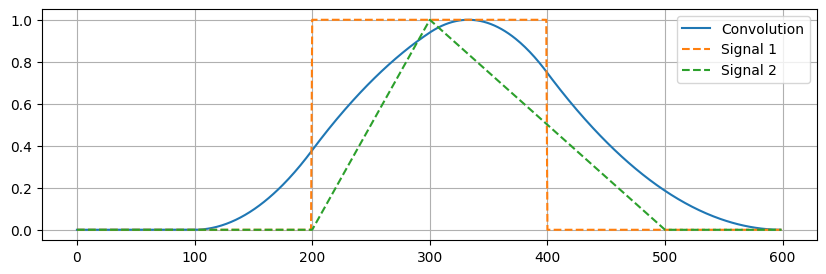

In [40]:

array1 = np.zeros(600)
array1[200:400] = 1
array2 = np.zeros(600)
# array2[200:400] = 1
array2[200:300] =  [(i-200)/(300 - 200) for i in range(200,300)]
array2[300:500] =  [(500 - i)/(500 - 300) for i in range(300,500)]
conv = np.zeros(len(array1)+len(array2)-1)
for i in range(len(conv)):
    sum = 0
    for j in range(len(array1)):
        if i-j >=0 and i-j < len(array2):
            sum += array1[j]*array2[i-j]
    conv[i] = sum
conv = conv / np.max(conv)

plt.figure(figsize=(10,3))
plt.plot(conv[300:len(conv)-300])
plt.plot(array1, linestyle='dashed')
plt.plot(array2, linestyle='dashed')
plt.legend(['Convolution', 'Signal 1', 'Signal 2'])
plt.grid()
plt.show()



The signal somewhat resembles what happens when you give a step current to a RC circuit and record the voltage across the capacitor. 

---
### 3. Linear filters in image processing ###
Neurons in the early visual system are often treated as linear filters, which leads to a description of visual function as image processing. We will therefore consider the convolution of images with 2-dimensional convolution kernels, in this case low-pass filtering (blurring) of an image (for example when the retinal image is formed, due to the finite point spread function of the human eye).
We will use blurring to attenuate a high-contrast high spatial frequency pattern in an image.

First we need to actually load the image into our notebook, which can be done by using the Image module.

(302, 323, 3)


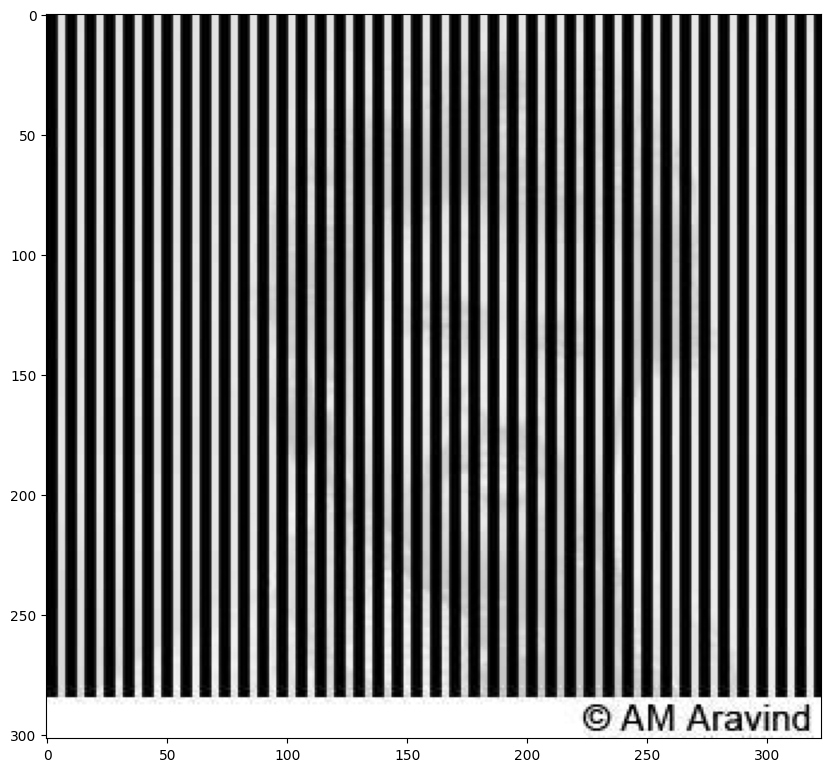

In [41]:
import numpy as np
import pylab as pl
import matplotlib.image as image
from scipy.stats import multivariate_normal

img = image.imread('masking.jpg') # include path to file if not in current directory
img = np.array(img)
print(img.shape)
img = img[:,:,0]

# we increase the figure size so that the high-contrast grating in the image has a strong masking effect at normal reading distance
pl.rcParams["figure.figsize"] = [10,10]

pl.imshow(img, cmap="gray")
pl.show()

The high-contrast vertical grating in this image masks the picture (change your viewing distance to find the point where the masking effect is maximal).

To filter the image, we first define a function that returns a 2-dimensional Gaussian kernel.

In [42]:
def get_gauss2d_kernel(size,std,res):
    '''
    return a two-dimesional Gaussian kernel of shape (size*(1/resolution),size*(1/resolution))
    with a standard deviation std
    '''
    x,y = np.mgrid[-size/2:size/2:res,-size/2:size/2:res]
    pos = np.empty(x.shape + (2,))
    pos[:, :, 0] = x
    pos[:, :, 1] = y
    
    mean = (0,0)
    cov = [[std, 0], [0, std]]
    
    dist = multivariate_normal(mean, cov)
    return dist.pdf(pos)

We can visualize such a kernel by using `imshow`.

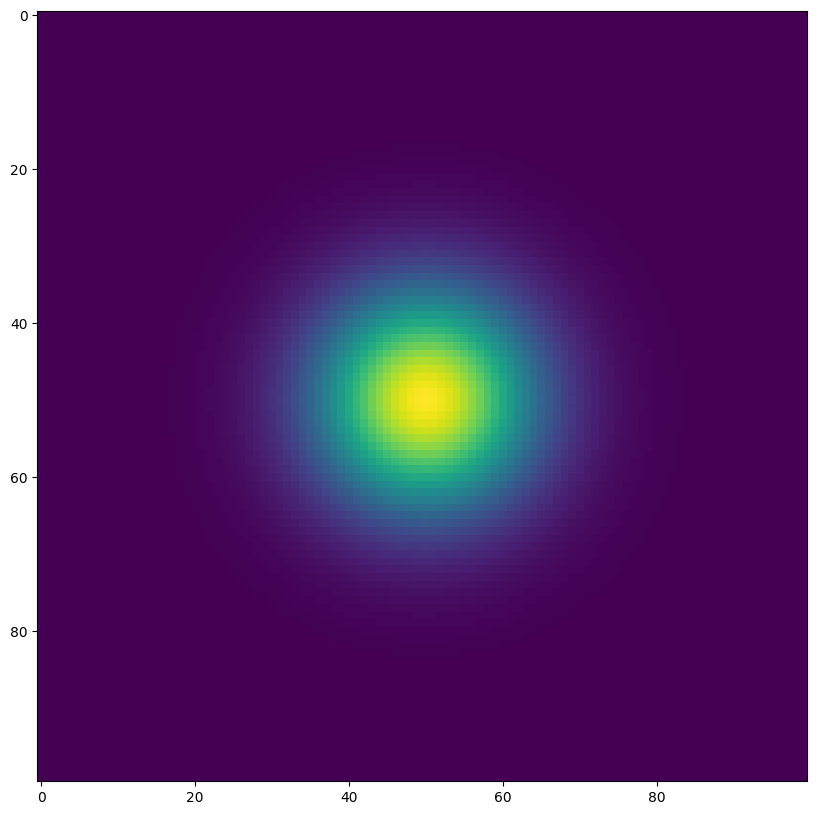

In [43]:
pl.imshow(get_gauss2d_kernel(10,1,0.1))
pl.show()

Play around with the parameters of `get_gauss_kernel` and try to understand their influences on the resulting function.

Next we use a built-in function to calculate the 2d convolution.

In [44]:
from scipy.signal import convolve2d

Use `convolve2d` and `get_gauss2d_kernel` to convolve the image with a Gaussian kernel.
Use different widths for the Gaussian and describe the effect.

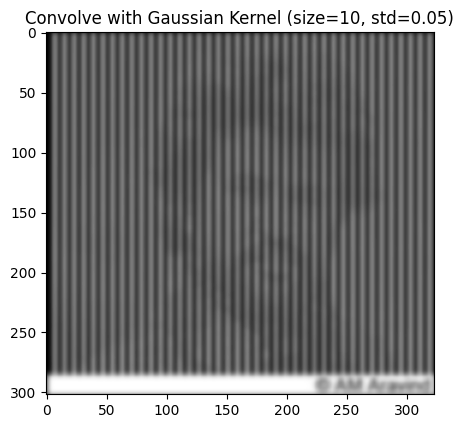

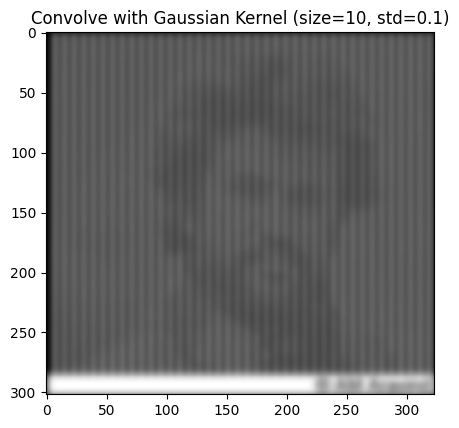

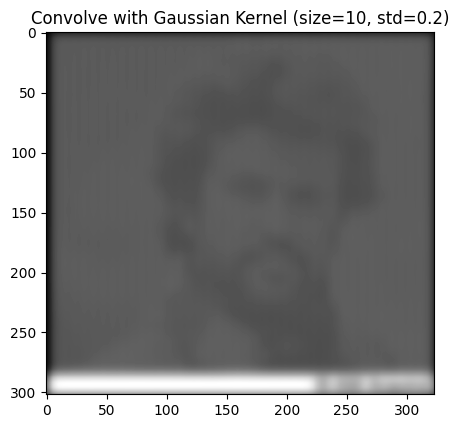

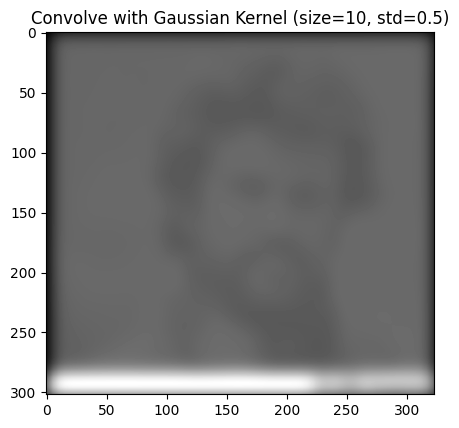

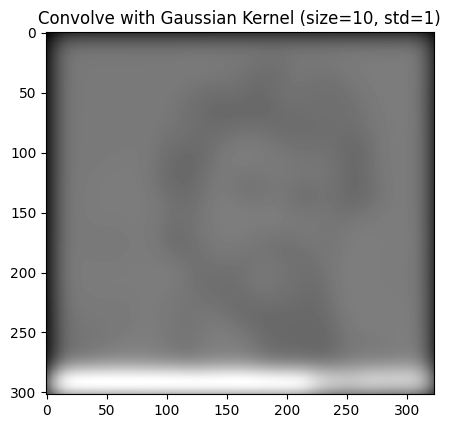

In [45]:
# convolve2d(img, get_gauss2d_kernel(10,1,0.1), mode='same')
size = 10
stds = [0.05, 0.1, 0.2, 0.5, 1]
for std in stds:
    plt.figure(figsize=(5,5))
    plt.imshow(convolve2d(img, get_gauss2d_kernel(size,std,0.1), mode='same'), cmap='gray')
    plt.title(f'Convolve with Gaussian Kernel (size={size}, std={std})')
    plt.show()

Over the kernel sizes, we see that the the black bars go away, but the more we increase the kernel size (stdev) the blur the image of the person becomes. 

----

## II. Fourier Transformation

### 1. Scaling Theorem ###

Show that 
for a function $s(t)$ with Fourier transform $S(f)$, the function on a scaled time axis $s(bt)$ has a Fourier transform that is inversely scaled on the frequency axis $\frac{1}{|b|} S(\frac{f}{b})$.


#### Ans:
We start with defining $S(f)$ 
$$
S(f) = \int s(t) \exp(-2\pi ift)  \, dt
$$
Now for $s(bt)$ , we will have: 
$$
\int s(bt) \exp\left( -\frac{2\pi if}{b}(bt) \right)  \, \frac{d(bt)}{b} = \frac{1}{b}S\left( \frac{f}{b} \right)
$$

### 2. Gaussian ###

Determine the FT of $\exp{(-x^2/2 \sigma^2)}$ analytically.
(Hint: Use completion of the square)

#### Ans: 
Lets compute over the variables $x$ and $\omega$:
$$
F.T.\left\{ -\frac{x^2}{2\sigma^2}  \right\} = \int^{\infty}_{-\infty} \exp\left( -\frac{x^2}{2\sigma^2} \right) \exp(-i\omega x) \, dx 
$$
$$
F.T.\left\{ -\frac{x^2}{2\sigma^2}  \right\} 
= \int \exp\left( -\left( \left( \frac{x}{\sigma \sqrt{ 2 } }\right)^2
+ 2 \left( \frac{x}{\sigma \sqrt{ 2 } }\right)(-\frac{i\omega \sigma }{\sqrt{ 2 }}) 
+ \left(-\frac{i\omega \sigma }{\sqrt{ 2 }}\right)^2 
- \left(-\frac{i\omega \sigma }{\sqrt{ 2 }}\right) \right) \right) \, dx 
$$
$$
F.T.\left\{ -\frac{x^2}{2\sigma^2}  \right\} 
= \exp\left( -\frac{\omega^2\sigma^2}{2} \right)
\int^{\infty}_{-\infty} \exp \left( -\frac{1}{2\sigma^2} (x-i\omega \sigma^2)^2\right) \, dx 
$$
$$
F.T.\left\{ -\frac{x^2}{2\sigma^2}  \right\} 
= \frac{1}{\sigma} \sqrt{ \frac{\pi}{2} } 
\exp\left( -\frac{\omega^2\sigma^2}{2} \right)
$$


### 3. One-dimensional FT ###

We first consider signals with a single frequency.

**a)**
Generate an array with 200 values of a 100 Hz cosine signal sampled at 1 kHz.

**b)**
Calculate (and plot) the Fourier Transform using NumPy´s `fft()`. Does it look as you expected? How are the different frequencies represented?

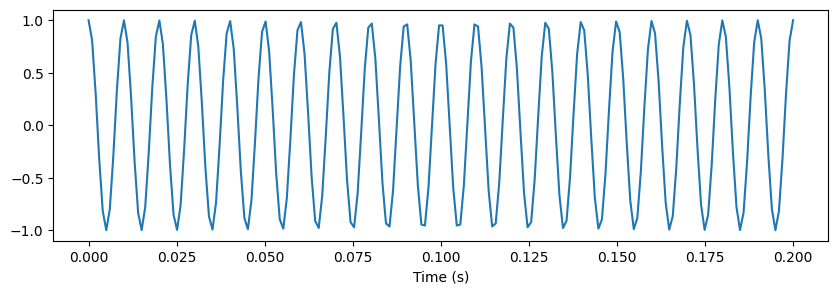

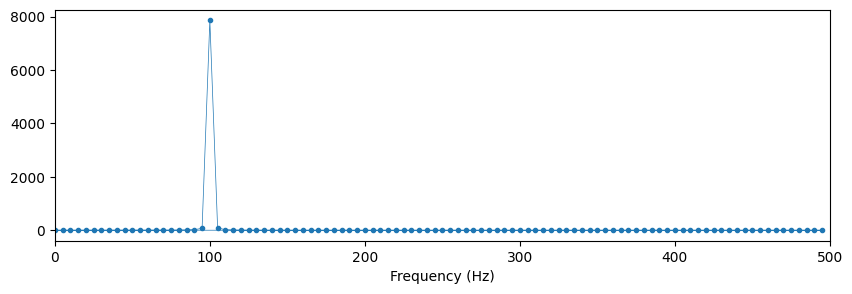

In [46]:
sampling_rate = 1e3
length = 200
time = length/sampling_rate
frequency = 100 
t = np.linspace(0, time, int(sampling_rate * time))
array_3 = np.cos(2 * np.pi * frequency * t)
plt.figure(figsize=(10,3))
plt.plot(t, array_3)
plt.xlabel('Time (s)')
plt.show()

fast_transform = fft.fft(array_3)
frequency = fft.fftfreq(len(array_3), d=1/sampling_rate)
plt.figure(figsize=(10,3))
plt.plot(frequency, fast_transform**2, marker='.', linewidth=0.5)
plt.xlim(0, 500)
plt.xlabel('Frequency (Hz)')
plt.show()

**c)**
Double the period of the cosine. How does the FT differ?

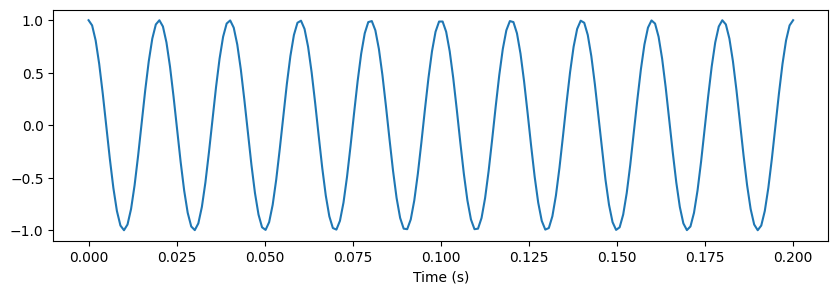

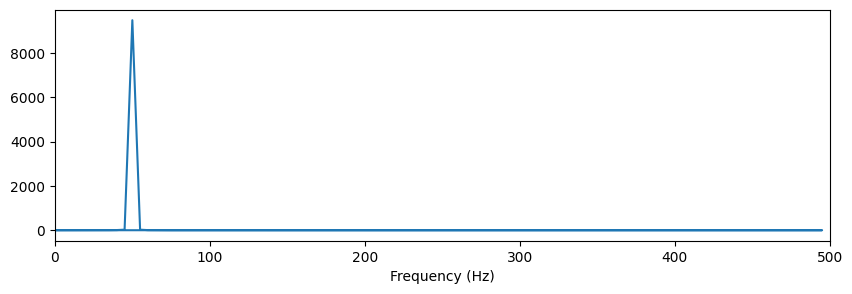

In [47]:
sampling_rate = 1e3
length = 200
time = length/sampling_rate
frequency = 50 
t = np.linspace(0, time, int(sampling_rate * time))
array_3 = np.cos(2 * np.pi * frequency * t)
plt.figure(figsize=(10,3))
plt.plot(t, array_3)
plt.xlabel('Time (s)')
plt.show()

fast_transform = fft.fft(array_3)
frequency = fft.fftfreq(len(array_3), d=1/sampling_rate)
plt.figure(figsize=(10,3))
plt.plot(frequency, fast_transform**2)
plt.xlim(0, 500)
plt.xlabel('Frequency (Hz)')
plt.show()

**d)**
Repeat with a sine instead of a cosine. What is different now?
Note that in general the FT is a complex-valued function.
What property must a function have to have a real-valued FT?

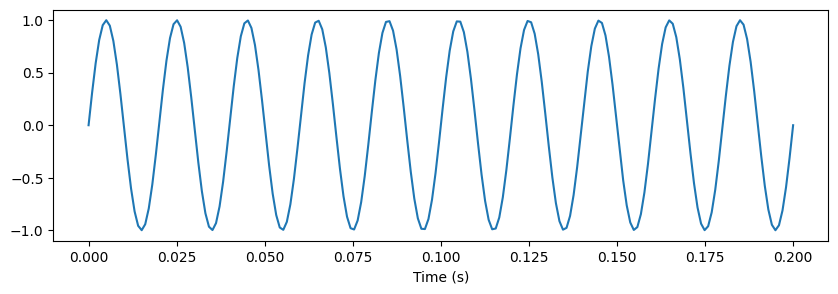

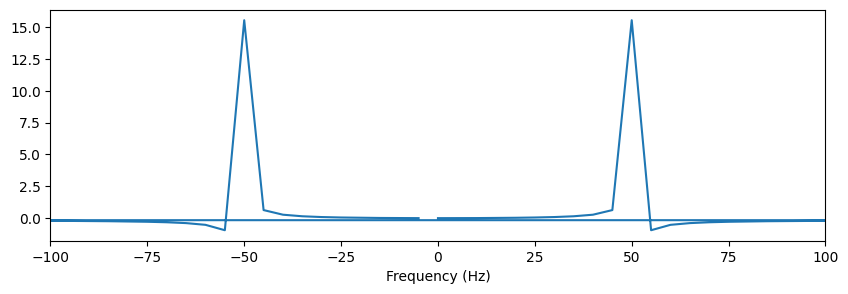

Because sine is a complex function, its Fourier square is negative. 
 THus functions need to be symmetric over y axis to have positive square.


In [48]:
sampling_rate = 1e3
length = 200
time = length/sampling_rate
frequency = 50 
t = np.linspace(0, time, int(sampling_rate * time))
array_3 = np.sin(2 * np.pi * frequency * t)
plt.figure(figsize=(10,3))
plt.plot(t, array_3)
plt.xlabel('Time (s)')
plt.show()

fast_transform = fft.fft(array_3)
frequency = fft.fftfreq(len(array_3), d=1/sampling_rate)
plt.figure(figsize=(10,3))
plt.plot(frequency, np.real(fast_transform))
plt.xlim(-100, 100)
plt.xlabel('Frequency (Hz)')
plt.show()
print("Because sine is a complex function, its Fourier square is negative. \n THus functions need to be symmetric over y axis to have positive square.")

### 4. Two-dimensional FT ###

**a)**
Load and plot the image `munich.jpg`. This is kind of a "natural" image.

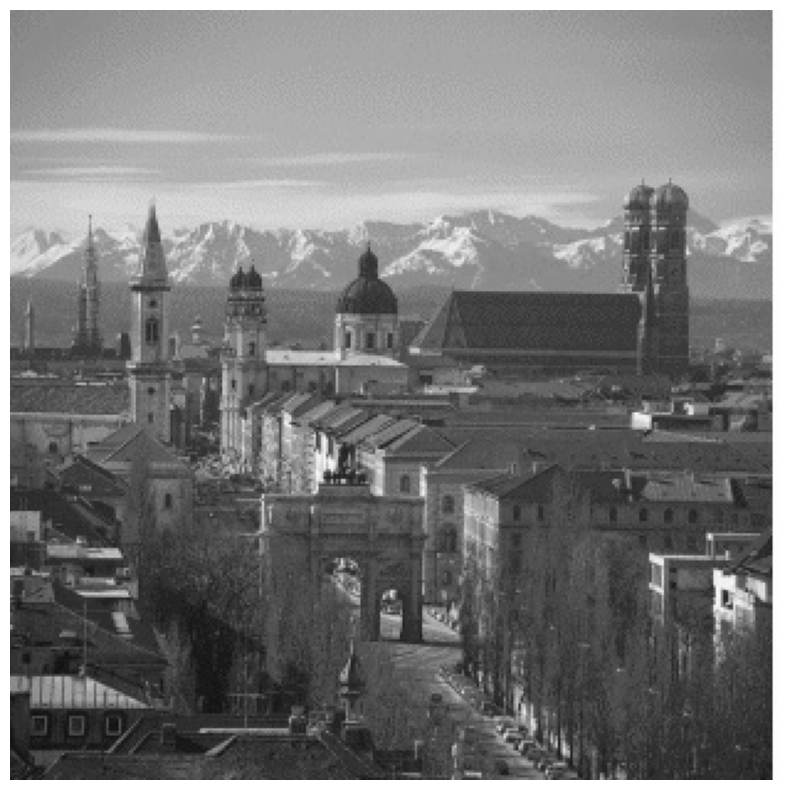

In [49]:
img2 = image.imread('munich.jpg')
pl.imshow(img2)
pl.axis('off')
pl.show()

**b)**
Calculate the 2-dimensional FT using `fft2()`. Try to plot the spectrum of the image. What problems do you encounter?

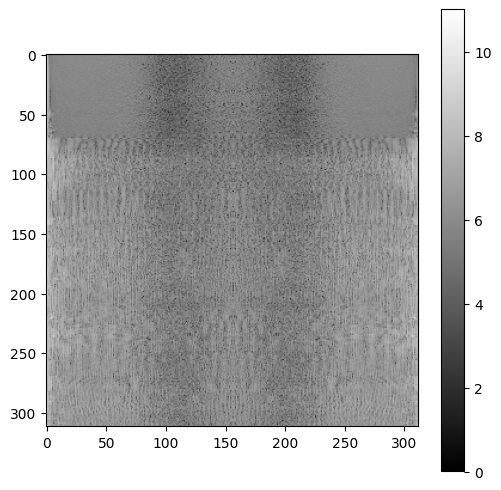

In [50]:
# plot spectrum of the image using fft2
# plt.imshow(np.abs(fft.fft2(img2))/np.abs(fft.fft2(img2).max()), cmap='gray')
plt.figure(figsize=(6,6))
plt.imshow(np.abs(np.log((fft.fft2(img2).mean(axis=2))+1)), cmap='gray')
plt.colorbar()
# plt.axis('off')
plt.show()

So many! 
1. First, need absolute values. 
2. Then imshow makes it all look red!
3. Then I normalized it by dividing it by `np.abs(np.max(...))`, it all looks black now
4. Because the values range a lot from $(-\infty,\infty)$ its better if we take a `np.log(...)+1` instead of taking a mean. We add `+1` to make sure no values accidentally go to $\infty$

---
### 5. Convolution using the FT ###
Retinal receptive fields are organized in a center-surround fashion.
A classical model for a radially symmetrical center-surround receptive field is the Difference of Gaussians (DoG),
where two Gaussians with different widths are subtracted from each other:

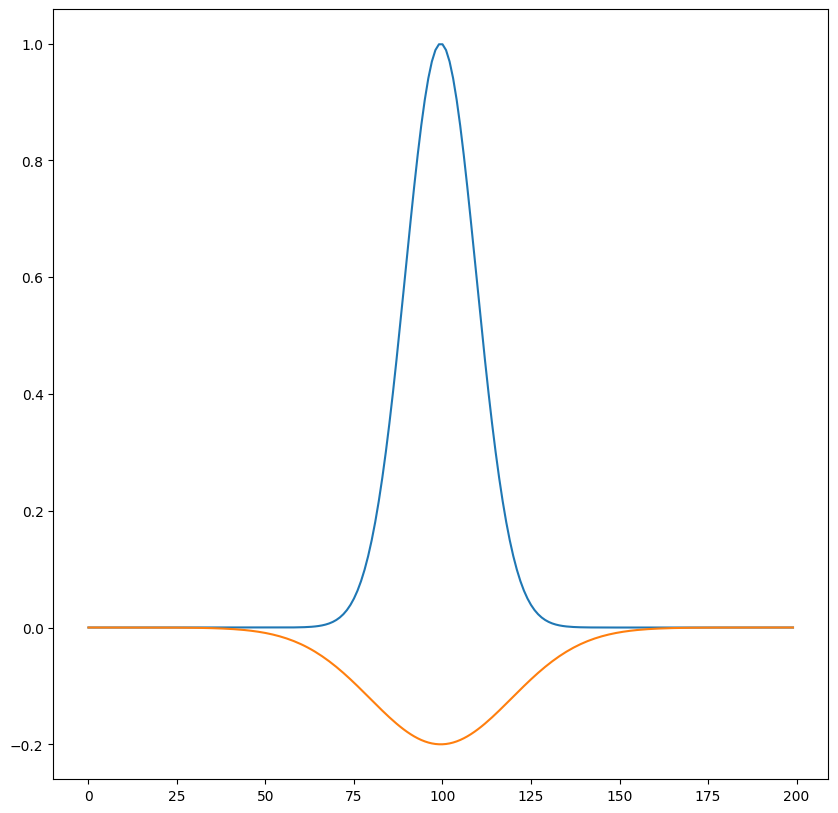

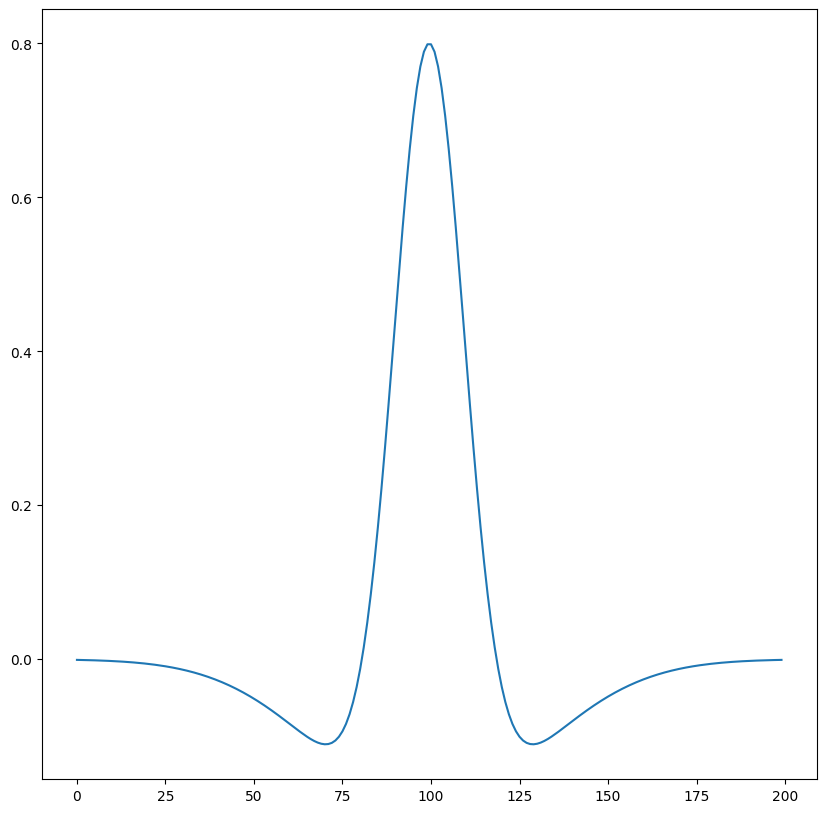

In [51]:
from scipy.signal.windows import gaussian
pl.plot(gaussian(200,10))
pl.plot(-0.2*gaussian(200,20))
pl.figure()
pl.plot(gaussian(200,10)-0.2*gaussian(200,30))
pl.show()

**a)** Modify the `get_gauss2d_kernel` function from above to define a function that yields a DoG kernel.

<Figure size 1000x1000 with 0 Axes>

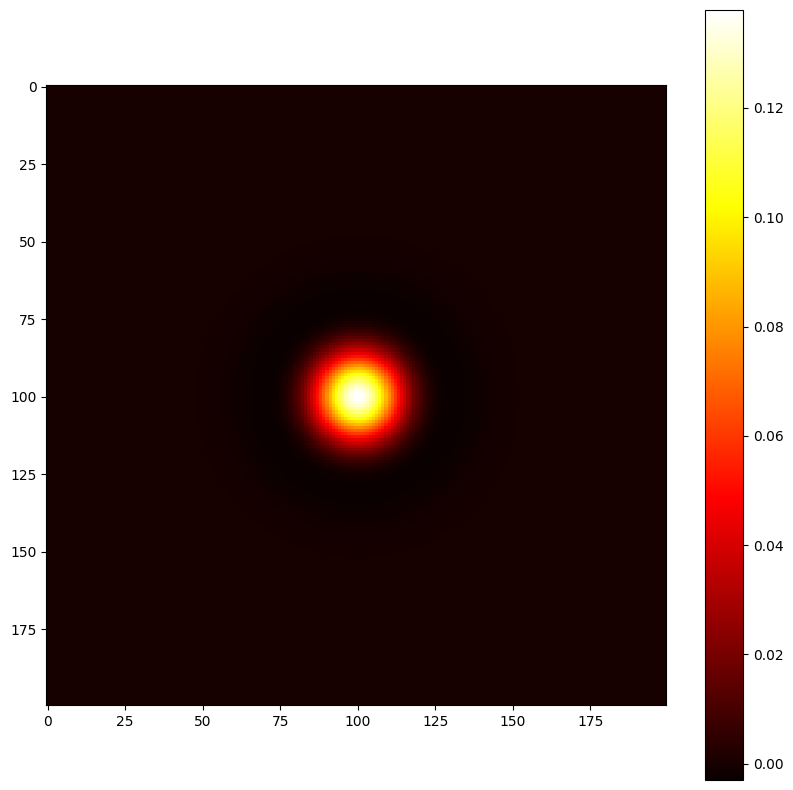

In [58]:
def get_dog_kernel(size, std1, std2, scale, res,):
    '''
    return a two dimesional DoG kernel of shape (size*(1/resolution),size*(1/resolution))
    '''
    return get_gauss2d_kernel(size, std1, res) - scale*get_gauss2d_kernel(size, std2, res)
    
    
    
pl.hot()
pl.figure()
pl.imshow(get_dog_kernel(20,1,3,0.4,0.1))
pl.colorbar()
pl.show()

**b)** Using this function, generate a 12x12 pixel convolution kernel corresponding to a Difference of Gaussians with widths of 0.5 and 2 pixels for the positive and negative components, respectively, and equal scaling.

<Figure size 1000x1000 with 0 Axes>

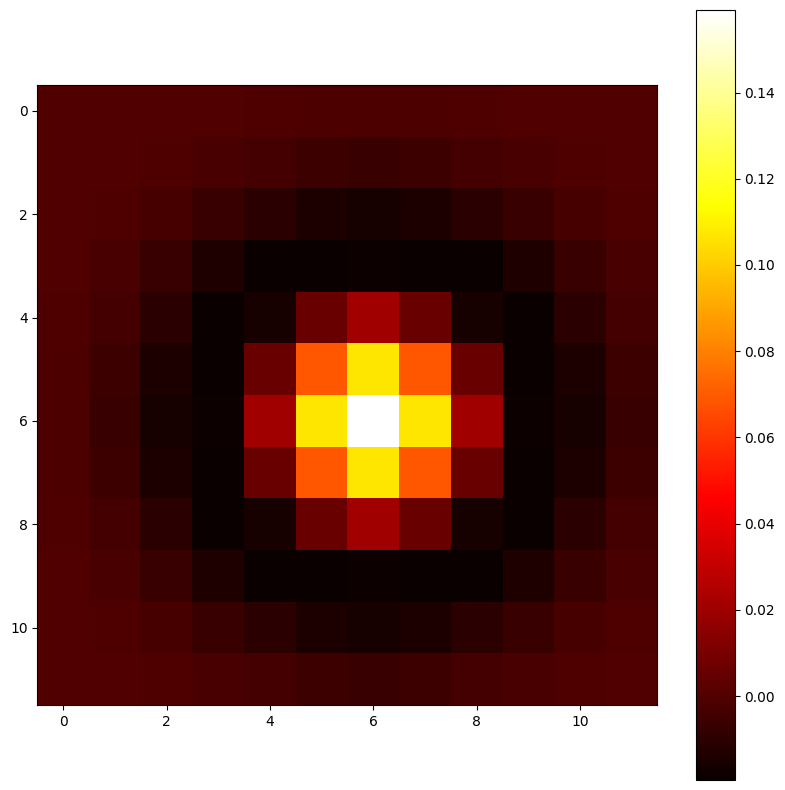

In [59]:
kernel = get_dog_kernel(6, 0.5, 1, 1, 0.5)
pl.hot()
pl.figure()
pl.imshow(kernel)
pl.colorbar()

**c)** Now (re-)load the file `munich.jpg`. Convolve the image with the DoG kernel and plot the image. Describe the difference between the convolved image and the original.

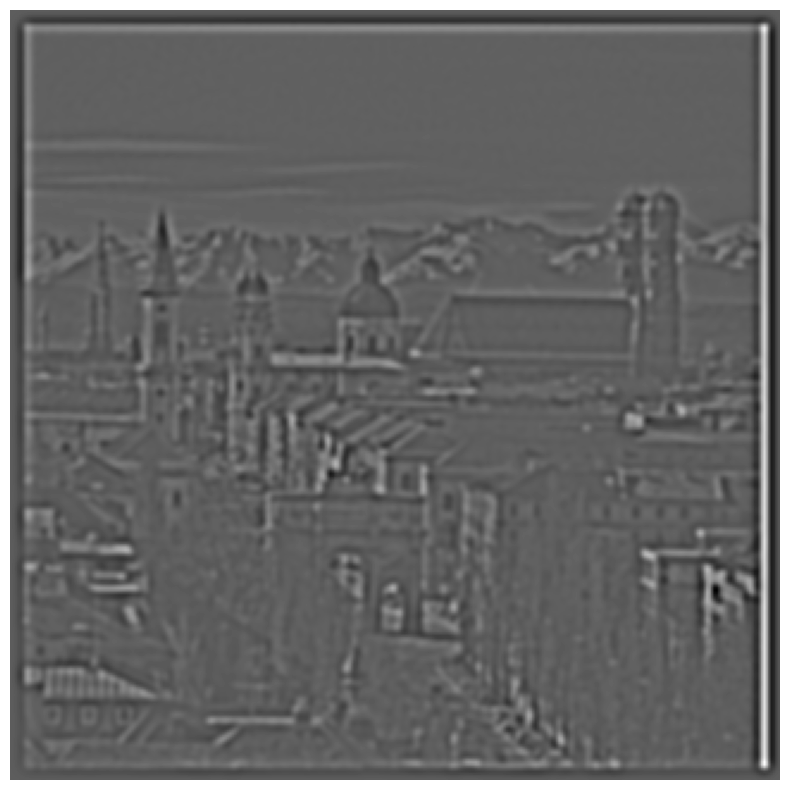

In [60]:
pl.imshow(convolve2d(img2.mean(axis=2), kernel), cmap='gray')
pl.axis('off')
pl.show()

**d)** Try to achieve the result using the convolution theorem. Take the 2-dimensional DoG kernel in an array that has the same size as the image (why is this necessary?) and calculate its FT. Multiply the spectra and perform the inverse FT on the product using `ifft2()`.
Plot the result (again remember that you may get complex values). Does it differ from the result above?

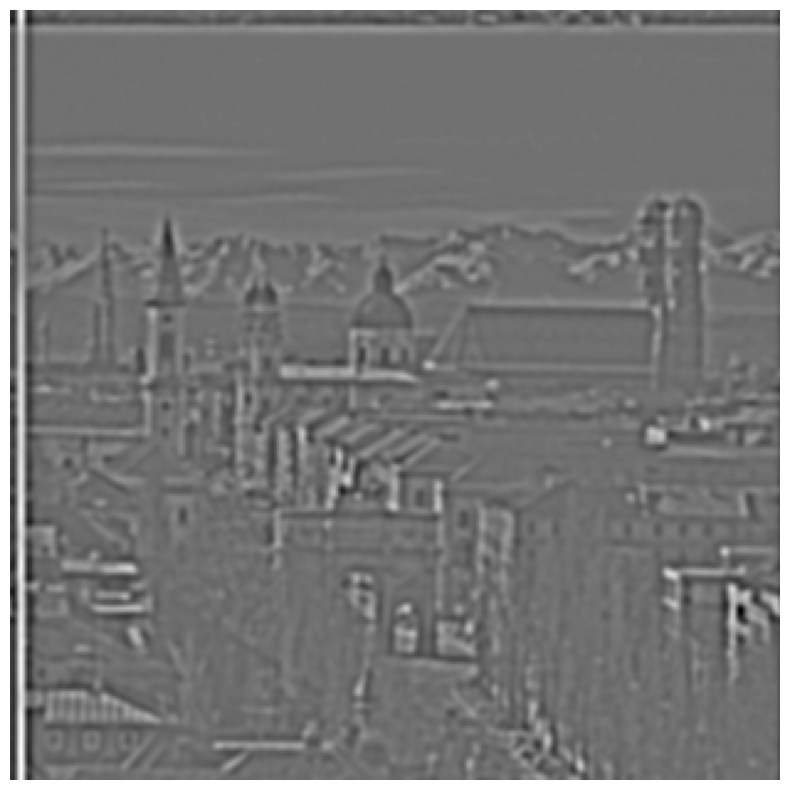

In [61]:
fft_img = fft.fft2(img2.mean(axis=2))
fft_kernel = fft.fft2(kernel, s=img2.shape[:2])
fft_convolved = fft_img * fft_kernel
convolved_img = fft.ifft2(fft_convolved).real
pl.imshow(convolved_img, cmap='gray')
pl.axis('off')
pl.show()